# Phenomenological model for polygon subsidence

In [1]:
from matplotlib import pyplot as plt
import scipy.signal
import sys, os
import numpy as np

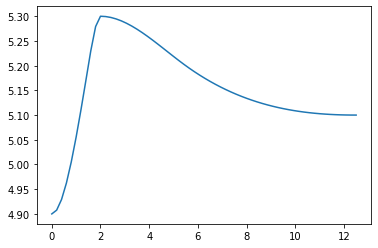

In [2]:
#x = [0, 5, 8, 11, 16]
x = [0,1.5,2.,5.5,12.5]
#x = [0+i for i in x]
z = [4.9, 5.2, 5.3, 5.2, 5.1]

x1 = x[:3]
x2 =x[2:]
z1 = z[:3]
z2 =z[2:]
cs1 = scipy.interpolate.CubicSpline(x1,z1, bc_type='clamped')
cs2 = scipy.interpolate.CubicSpline(x2,z2, bc_type='clamped')
X1 = np.linspace(x[0],x1[-1],11)
X2 = np.linspace(x1[-1],x2[-1],50)

Z = np.concatenate((cs1(X1),cs2(X2)))
#Z = np.linspace(1,62,62)
Z = np.delete(Z,11)
#X =  np.unique(np.concatenate((X1,X2)),0)
X =  np.concatenate((X1,X2))
X = np.delete(X,11)
#X = np.linspace(0,12.5,62)
plt.plot(X,Z)
#print (X,Z)
#print (len(Z),len(X))
#print ((0.01 - 0.001)/50, 0.01-0.00018)
#print (Z[0:13], Z[-1])

In [3]:
"""
r1 = 10.5**2
r2 = 12.5**2
h1 =0.3
pi = 3.1415
a1 = pi*h1 * ((12.5-12.5)**2 - (12.5-2)**2)
print (a1, (pi*r1*h1))
print (a1/(pi*r2), (pi*r1*h1)/(pi*r2))
print (10.5 * 0.3)
"""

'\nr1 = 10.5**2\nr2 = 12.5**2\nh1 =0.3\npi = 3.1415\na1 = pi*h1 * ((12.5-12.5)**2 - (12.5-2)**2)\nprint (a1, (pi*r1*h1))\nprint (a1/(pi*r2), (pi*r1*h1)/(pi*r2))\nprint (10.5 * 0.3)\n'

In [4]:
def ComputeDepression(H,R):
    X_r = R[0]
    X_c = R[-1] - R[0]
    r2 = X_c**2
    pi = 3.1415
    Rect_area = pi*(R[-1] - R[0])**2 * (np.max(H) - np.min(H) )
    #print (Rect_area)
    
    #f = [f1*(12.5-f2) for f1,f2 in zip(H-np.min(H), R)]
    f = [f1*(X[-1]-f2 - X[0]) for f1,f2 in zip(H-np.min(H), R)]
    integ = 2*3.1415 * scipy.integrate.trapz(f, x=R)
    excluded_v = integ/(pi*r2)
    integ =  (Rect_area - integ)/(pi*r2)
    
    #print ('Integ: ', integ, H,R)
    if integ < 0:
        integ = 0
    return np.round(integ,4),excluded_v


subgrid = lambda dmax, dex, d1 : (2 *dmax - 3 *dex ) * (d1/dmax)**2 + (2 *dex - dmax ) * (d1/dmax)**3

def ComputeTrueDepression(a,dmax, dex):
    f = lambda d : a - (2 *dmax - 3 *dex ) * (d/dmax)**2 + (2 *dex - dmax ) * (d/dmax)**3
    #dd = (2 *dmax - 3 *dex ) * (d/dmax)**2 + (2 *dex - dmax ) * (d/dmax)**3
    c = scipy.optimize.newton(f, 0.5,maxiter=100)
    #print ('Depression: ',a,c)
    return c

delta:  0 0.4 0.25725071505747416 0.26904980772756154
delta:  1 0.41 0.2704004294971429 0.27970004767425305
delta:  2 0.42 0.28355014378285687 0.2903502876742528


AssertionError: 

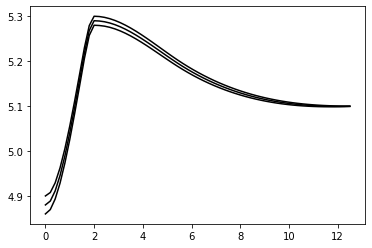

In [5]:

delta_vol = []
delta_d = []
delta_max = []
delta_ex = []
#print (m)

for i in range(0,51,1):
    L1 = np.linspace(0.02,0.01, 11)
    L2 = np.linspace(0.01,0.00, 51)
    L = np.concatenate((L1,L2))
    #print (len(L1),len(Z1))
    #print (L1,L2[:4])
    
    if i > 0:
        Z1 = [round(p1 - p2,8) for p1,p2 in zip(Z1,L)]
    else:
        Z1 = Z
    #print (Z1[0])
    zz = [z[0]-0.02*i, z[1]-0.012*i, z[2] - 0.01*i, z[3] - 0.007*i, z[4] - 0.002*i]
    if i %10 == 0 or True:
        plt.plot(X,Z1,'k-')
        #plt.plot(x,zz,'r*')
    delta_max.append(round(np.max(Z1) - np.min(Z1),4))
    
    c_ex = scipy.integrate.trapz(Z1-np.min(Z1), x=X)
    delta_ex.append(c_ex/X[-1])
    c1, c2 = ComputeDepression(Z1, X)
    delta_vol.append(c1)
    #print (2*delta_max[-1] - 3*delta_ex[-1])
    #print (i, subgrid(delta_max[-1],delta_ex[-1],.02), 2*delta_max[-1] - 3*delta_ex[-1])#, 2*delta_ex[-1] - delta_max[-1])
    print ('delta: ',i,delta_max[-1],delta_ex[-1], c2)
    assert ((2*delta_max[-1] - 3*delta_ex[-1]) >0)
    #print (delta_max[-1],delta_ex[-1])
    #delta_d.append(ComputeTrueDepression(delta_vol[-1], delta_max[-1],delta_ex[-1]))
    #print (Z1[11:], X[11:])
    #print (np.min(Z1[11:]))
#print (delta_d)
#USe delta_max and delta_ex and this volumetric ponded depth to compute true ponded depth
#print (delta_max,delta_ex)


1 0.001912876281243165 -0.08909894326304213 0.19159929550869476 0.15729156 0.062381832696000006
2 -0.016333090856310566 -0.19744574135366433 0.2641971609024429 0.15816529 0.06290233583299999
3 -0.02263441039565367 -0.24739253944428652 0.307595026296191 0.18318399999999999 0.07840275199999999
4 -0.013378896389995499 -0.2061393375349061 0.30539289168993744 0.25391521 0.127947874319
5 -0.007155149444881681 -0.1646861356255256 0.3030907570836837 0.33628400999999997 0.19501109739899997
6 -0.0029302419025375205 -0.12323293371614752 0.30078862247743177 0.43020481000000005 0.28217133487900004
7 -1.6047253496870133e-05 -0.0817797318067699 0.29848648787117993 0.53567761 0.392062442759
8 0.0020220855835734694 -0.04032652989738983 0.29618435326492654 0.65270241 0.5273182770389999
[(0.1052, 0.29144597421407464), (0.0839, 0.3138421407005885), (0.0917, 0.3362383071871025), (0.1453, 0.35863447367361556), (0.1989, 0.3810306401601286), (0.2525, 0.40342680664664243), (0.3061, 0.42582297313315637), (0.359

Text(0.5, 0, 'Rim subsidence [m]')

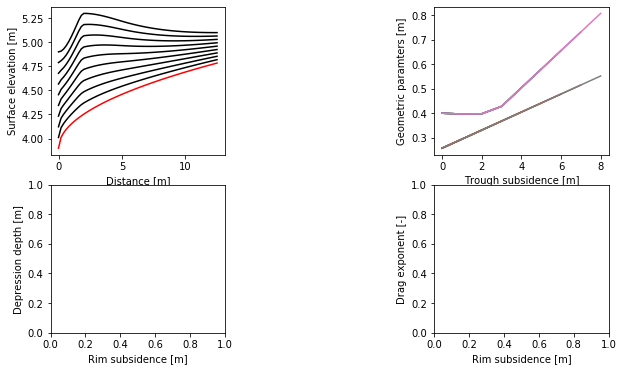

In [6]:
#January 9

fig, ax = plt.subplots(2, 2, figsize=(10,6),facecolor='w',edgecolor='k',gridspec_kw={'width_ratios':[1,1]})
fig.subplots_adjust(hspace=0.2,wspace=1.2)
ax = ax.ravel()

delta_vol = []
delta_d = []
delta_max = []
delta_ex = []
#print (m)
y = 3.9+ 0.25*np.sqrt(1*X)
#y = 3.9+ 0.2*(2.*X**(1/3))
Z1 = np.zeros((10,len(X)))
ax[0].plot(X,y,'r-')
for i in range(len(X)):
    #print (Z[i], y[i])
    xx = np.linspace(Z[i], y[i],10)
    Z1[:,i] = xx
for i in range(9):
    delta_max.append(round(np.max(Z1[i]) - np.min(Z1[i]),4))
    c_ex = scipy.integrate.trapz(Z1[i]-np.min(Z1[i]), x=X)
    delta_ex.append(c_ex/X[-1])
    #print (3*delta_max[-1] - 2*delta_ex[-1], 2*delta_ex[-1] - delta_max[-1])
    #print ('---',np.max(Z1[i]), np.min(Z1[i]), delta_max[-1], delta_ex[-1])
    if (subgrid(delta_max[-1],delta_ex[-1],.1) < 0):
        delta_vol.append(ComputeDepression(H=Z1[i,:], R=X))
        #delta_d.append(ComputeTrueDepression(delta_vol[-1], delta_max[-1],delta_ex[-1]))
        print (i, subgrid(delta_max[-1],delta_ex[-1],.2), 2*delta_max[-1] - 3*delta_ex[-1], 2*delta_ex[-1] - delta_max[-1],delta_max[-1]**2, delta_max[-1]**3)
    #assert (2*delta_max[-1] - 3*delta_ex[-1] >0)
    ax[0].plot(X,Z1[i,:],'k-')
    ax[1].plot(delta_max)
    ax[1].plot(delta_ex)
    

print (delta_vol,delta_d)
ax[0].set_ylabel('Surface elevation [m]')
ax[0].set_xlabel('Distance [m]')
ax[1].set_ylabel('Geometric paramters [m]')
ax[1].set_xlabel('Trough subsidence [m]')

ax[2].set_ylabel('Depression depth [m]')
ax[2].set_xlabel('Rim subsidence [m]')

ax[3].set_ylabel('Drag exponent [-]')
ax[3].set_xlabel('Rim subsidence [m]')


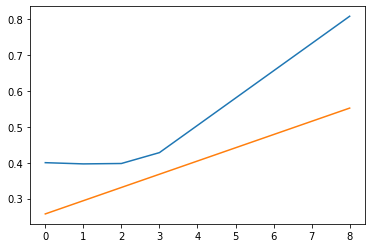

In [7]:
plt.plot(delta_max)
plt.plot(delta_ex)

In [8]:
H = 

SyntaxError: invalid syntax (<ipython-input-8-e6e611ccff94>, line 1)

[4.9, 5.2, 5.3] [5.3, 5.2, 5.1]
[4.7, 5.05, 5.1499999999999995] [5.1499999999999995, 5.1000000000000005, 5.1]
[4.5, 4.9, 5.0] [5.0, 5.0, 5.0]
[4.300000000000001, 4.75, 4.85] [4.85, 4.9, 4.9]
[4.1000000000000005, 4.6000000000000005, 4.7] [4.7, 4.8, 4.8]
[3.9000000000000004, 4.45, 4.55] [4.55, 4.7, 4.7]


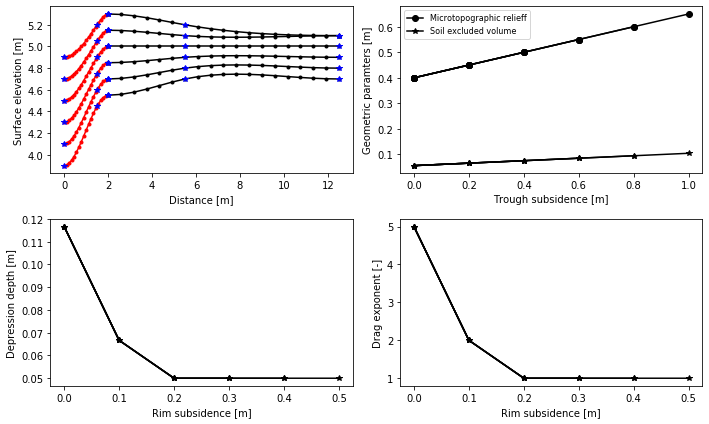

In [9]:
collapse_t = 0.02
collapse_r = 0.015
collapse_rc = 0.01
delta_max = []
delta_ex = []
thaw_depth = []
delta_d = []
delta_c = []
beta = []

fig, ax = plt.subplots(2, 2, figsize=(10,6),facecolor='w',edgecolor='k',gridspec_kw={'width_ratios':[1,1]})
fig.subplots_adjust(hspace=0.2,wspace=1.2)
ax = ax.ravel()
#fig.tight_layout()
for i in range(0,60,10):

    if i > 0:
        Z1 = [z1[0] - i*collapse_t, z1[1] - i*collapse_r, z1[2]- i*collapse_r]
        Z2 = [z2[0] - i*collapse_r, z2[1] - i*collapse_rc, z2[2]]
    else:
        Z1 = z1
        Z2 = z2
    if Z2[-2] <= Z2[-1]:
        Z2[-1] = Z2[-2]
    print (Z1, Z2)
    cs1 = scipy.interpolate.CubicSpline(x1,Z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,Z2, bc_type='clamped')

    X1 = np.linspace(0,x1[-1],19)
    X2 = np.linspace(x1[-1],x2[-1],19)
    
    
    ax[0].plot(X1, cs1(X1), '.-', color= 'r', label = 'fitted curve')
    ax[0].plot(X2, cs2(X2), '.-', color= 'k')
    ax[0].plot(x1, Z1, '*', color= 'b', label='measured data')
    ax[0].plot(x2, Z2, '*', color= 'b', label='measured data')
    
    XX1 = np.linspace(X1[0],X1[-1],100000)
    XX2 = np.linspace(X2[0],X2[-1],100000)
    integ1 = scipy.integrate.trapz(cs1(XX1)-np.min(cs1(XX1)), x=XX1)#, even='avg')
    integ2 = scipy.integrate.trapz(cs2(XX2)-np.min(cs2(XX2)), x=XX2)#, even='avg')
    
    del_max = round(cs1(X1)[-1] - cs1(X1)[0],4)
    #print (integ1, integ2)
    total = scipy.integrate.cumtrapz(np.concatenate((cs1(XX1),cs2(XX2))), x=np.concatenate((XX1,XX2)),initial=0)
    #print (del_max, (integ1 + integ1) /16.0)
    delta_max.append(del_max)
    delta_ex.append((integ1 + integ1) /12.5)
    thaw_depth.append((z[0] - cs1(XX1)[0]))
    
    #t1 = 0.15 - (z1[-1] - cs1(XX1)[-1])
    t1 = (cs1(XX1)[-1] - cs2(XX2)[-1]) # delta_c = z_rim - z_c
    #print (t1,cs1(XX1)[-1],cs2(XX2)[-1])
    if t1> 0.0:#cs1(XX1)[-1] > cs2(XX2)[-1]:
        m = (0.15 - 0.05)/0.3
        delta_d.append(0.15 - m*(0.3 - t1))
        #delta_c.append(0.3 - t1)
        delta_c.append(0.5*(z[0] - cs1(XX1)[0]))
        
        m = (7.0 - 1.0)/0.3
        beta.append(7 - m*(0.3 - t1))
    else:
        delta_d.append(0.05)
        beta.append(1.0)
        #delta_c.append(0.3 - t1)
        delta_c.append(0.5*(z[0] - cs1(XX1)[0]))
                       
    if i == 0:
        ax[1].plot(thaw_depth,delta_max, '-o',label='Microtopographic relieff',color='k')
        ax[1].plot(thaw_depth,delta_ex,'-*',label='Soil excluded volume',color='k')
        ax[2].plot(delta_c,delta_d,'-*',label='delta_d',color='k')
        ax[3].plot(delta_c,beta,'-*',label='drag_coeff',color='k')
    else:
        ax[1].plot(thaw_depth,delta_max, '-o',color='k')
        ax[1].plot(thaw_depth,delta_ex,'-*',color='k')
        ax[2].plot(delta_c,delta_d,'-*',color='k')
        ax[3].plot(delta_c,beta,'-*',color='k')


ax[0].set_ylabel('Surface elevation [m]')
ax[0].set_xlabel('Distance [m]')
ax[1].set_ylabel('Geometric paramters [m]')
ax[1].set_xlabel('Trough subsidence [m]')

ax[2].set_ylabel('Depression depth [m]')
ax[2].set_xlabel('Rim subsidence [m]')

ax[3].set_ylabel('Drag exponent [-]')
ax[3].set_xlabel('Rim subsidence [m]')


ax[1].legend(loc='best',fontsize=8)
fig.tight_layout()
#plt.savefig(u'/Users/ajc/research/PostProcessing/2019/polygon_subsidence_model/dynamic_sg_coarse.pdf',bbox_inches='tight',dpi=100)

0.1999999999999993 5.3 5.1000000000000005


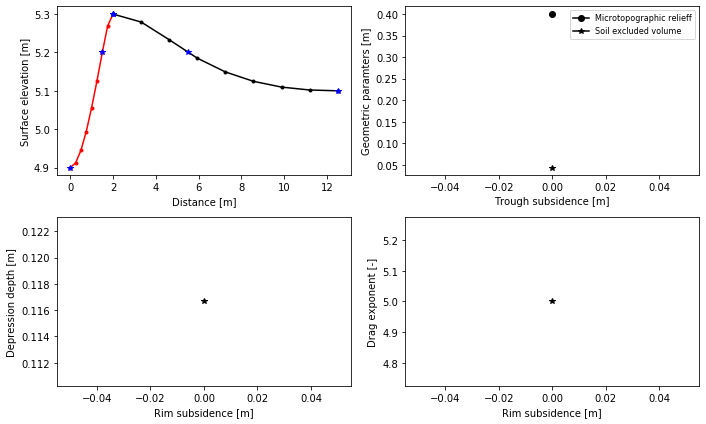

In [10]:
collapse = 0.02
factor = 2.
delta_max = []
delta_ex = []
thaw_depth = []
delta_d = []
delta_c = []
beta = []

fig, ax = plt.subplots(2, 2, figsize=(10,6),facecolor='w',edgecolor='k',gridspec_kw={'width_ratios':[1,1]})
fig.subplots_adjust(hspace=0.2,wspace=1.2)
ax = ax.ravel()
#fig.tight_layout()
for i in range(0,1,1):

    if i > 0:
        Z1 = [z1[0] - i*collapse, z1[1] - i*collapse/(factor-0.), z1[2]- i*collapse/(factor-0)]
        Z2 = [z2[0] - i*collapse/(factor-0), z2[1] - i*collapse/(factor+.5), z2[2]]
    else:
        Z1 = z1
        Z2 = z2
    if Z2[1] <= Z2[2]:
        Z2[2] = Z2[1]
    cs1 = scipy.interpolate.CubicSpline(x1,Z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,Z2, bc_type='clamped')

    X1 = np.linspace(0,x1[-1],9)
    X2 = np.linspace(x1[-1],x2[-1],9)
    
    
    ax[0].plot(X1, cs1(X1), '.-', color= 'r', label = 'fitted curve')
    ax[0].plot(X2, cs2(X2), '.-', color= 'k')
    ax[0].plot(x1, Z1, '*', color= 'b', label='measured data')
    ax[0].plot(x2, Z2, '*', color= 'b', label='measured data')
    
    XX1 = np.linspace(X1[0],X1[-1],100000)
    XX2 = np.linspace(X2[0],X2[-1],100000)
    integ1 = scipy.integrate.trapz(cs1(XX1)-np.min(cs1(XX1)), x=XX1)#, even='avg')
    integ2 = scipy.integrate.trapz(cs2(XX2)-np.min(cs2(XX2)), x=XX2)#, even='avg')
    
    del_max = round(cs1(X1)[-1] - cs1(X1)[0],4)
    #print (integ1, integ2)
    total = scipy.integrate.cumtrapz(np.concatenate((cs1(XX1),cs2(XX2))), x=np.concatenate((XX1,XX2)),initial=0)
    #print (del_max, (integ1 + integ1) /16.0)
    delta_max.append(del_max)
    delta_ex.append((integ1 + integ1) /16.0)
    thaw_depth.append((z[0] - cs1(XX1)[0]))
    
    #t1 = 0.15 - (z1[-1] - cs1(XX1)[-1])
    t1 = (cs1(XX1)[-1] - cs2(XX2)[-1]) # delta_c = z_rim - z_c
    print (t1,cs1(XX1)[-1],cs2(XX2)[-1])
    if t1> 0.0:#cs1(XX1)[-1] > cs2(XX2)[-1]:
        m = (0.15 - 0.05)/0.3
        delta_d.append(0.15 - m*(0.3 - t1))
        #delta_c.append(0.3 - t1)
        delta_c.append(0.5*(z[0] - cs1(XX1)[0]))
        
        m = (7.0 - 1.0)/0.3
        beta.append(7 - m*(0.3 - t1))
    else:
        delta_d.append(0.05)
        beta.append(1.0)
        #delta_c.append(0.3 - t1)
        delta_c.append(0.5*(z[0] - cs1(XX1)[0]))
                       
    if i == 0:
        ax[1].plot(thaw_depth,delta_max, '-o',label='Microtopographic relieff',color='k')
        ax[1].plot(thaw_depth,delta_ex,'-*',label='Soil excluded volume',color='k')
        ax[2].plot(delta_c,delta_d,'-*',label='delta_d',color='k')
        ax[3].plot(delta_c,beta,'-*',label='drag_coeff',color='k')
    else:
        ax[1].plot(thaw_depth,delta_max, '-o',color='k')
        ax[1].plot(thaw_depth,delta_ex,'-*',color='k')
        ax[2].plot(delta_c,delta_d,'-*',color='k')
        ax[3].plot(delta_c,beta,'-*',color='k')


ax[0].set_ylabel('Surface elevation [m]')
ax[0].set_xlabel('Distance [m]')
ax[1].set_ylabel('Geometric paramters [m]')
ax[1].set_xlabel('Trough subsidence [m]')

ax[2].set_ylabel('Depression depth [m]')
ax[2].set_xlabel('Rim subsidence [m]')

ax[3].set_ylabel('Drag exponent [-]')
ax[3].set_xlabel('Rim subsidence [m]')


ax[1].legend(loc='best',fontsize=8)
fig.tight_layout()
#plt.savefig(u'/Users/ajc/research/PostProcessing/2019/polygon_subsidence_model/dynamic_sg_coarse.pdf',bbox_inches='tight',dpi=100)

[4.9, 5.2, 5.3] [5.3, 5.2, 5.1]
[4.7, 5.1000000000000005, 5.2] [5.2, 5.12, 5.1]
[4.5, 5.0, 5.1] [5.1, 5.04, 5.04]
[4.300000000000001, 4.9, 5.0] [5.0, 4.96, 4.96]
[4.1000000000000005, 4.8, 4.8999999999999995] [4.8999999999999995, 4.88, 4.88]
[3.9000000000000004, 4.7, 4.8] [4.8, 4.8, 4.8]


FileNotFoundError: [Errno 2] No such file or directory: '/Users/ajc/research/PostProcessing/2019/polygon_subsidence_model/dynamic_sg_coarse.pdf'

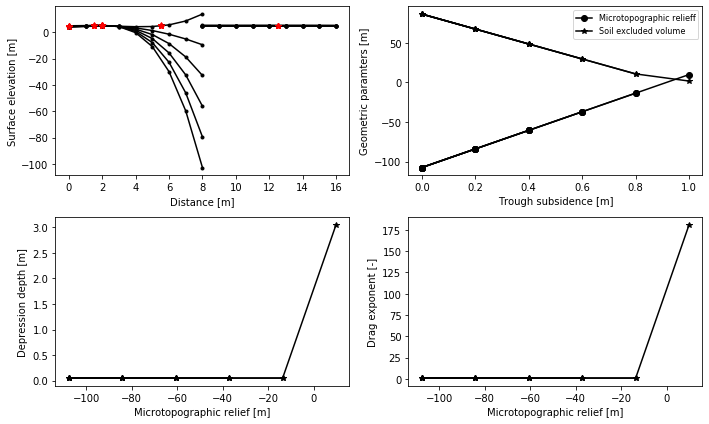

In [11]:
# For coase plot
collapse = 0.02
factor = 2.
delta_max = []
delta_ex = []
thaw_depth = []
trough_subs = []
delta_d = []
delta_c = []
beta = []
rim_collap = []

fig, ax = plt.subplots(2, 2, figsize=(10,6),facecolor='w',edgecolor='k',gridspec_kw={'width_ratios':[1,1]})
fig.subplots_adjust(hspace=0.2,wspace=1.2)
ax = ax.ravel()
#fig.tight_layout()
for i in range(0,60,10):

    if i > 0:
        Z1 = [z1[0] - i*collapse, z1[1] - i*collapse/(factor-0.), z1[2]- i*collapse/(factor-0)]
        Z2 = [z2[0] - i*collapse/(factor-0), z2[1] - i*collapse/(factor+.5), z2[2]]
    else:
        Z1 = z1
        Z2 = z2
    if Z2[1] <= Z2[2]:
        Z2[2] = Z2[1]
    cs1 = scipy.interpolate.CubicSpline(x1,Z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,Z2, bc_type='clamped')

    X1 = np.linspace(0,8,9)
    X2 = np.linspace(8,16,9)
    
    
    ax[0].plot(X1, cs1(X1), '.-', color= 'k', label = 'fitted curve')
    ax[0].plot(X2, cs2(X2), '.-', color= 'k')
    ax[0].plot(x1, Z1, '*', color= 'r', label='measured data')
    ax[0].plot(x2, Z2, '*', color= 'r', label='measured data')
    print (Z1,Z2)
    XX1 = np.linspace(X1[0],X1[-1],100000)
    XX2 = np.linspace(X2[0],X2[-1],100000)
    integ1 = scipy.integrate.trapz(cs1(XX1)-np.min(cs1(XX1)), x=XX1)#, even='avg')
    integ2 = scipy.integrate.trapz(cs2(XX2)-np.min(cs2(XX2)), x=XX2)#, even='avg')
    
    del_max = round(cs1(X1)[-1] - cs1(X1)[0],4)
    
    total = scipy.integrate.cumtrapz(np.concatenate((cs1(XX1),cs2(XX2))), x=np.concatenate((XX1,XX2)),initial=0)
    
    delta_max.append(del_max)
    delta_ex.append((integ1 + integ1) /16.0)
    #thaw_depth.append(z[0] - (z[0] - cs1(XX1)[0]))
    trough_subs.append((z[0] - cs1(XX1)[0]))
    thaw_depth = trough_subs
    t1 = (cs1(XX1)[-1] - cs2(XX2)[-1]) 
    
    if i ==0:
        rim_collap.append(0.4)
    else:
        rim_collap.append(0.4+0.5*del_max)
    if t1> 0.0:#cs1(XX1)[-1] > cs2(XX2)[-1]:
        m = (0.15 - 0.05)/(0.4-0.1)
        delta_d.append(0.15 - m*(0.3 - t1))
        delta_c.append(0.5*(z[0] - cs1(XX1)[0]))
        
        m = (7.0 - 1.0)/0.3
        beta.append(7 - m*(0.3 - t1))
    else:
        delta_d.append(0.05)
        beta.append(1.0)
        delta_c.append(0.5*(z[0] - cs1(XX1)[0]))
                       
    if i == 0:
        #ax[1].invert_xaxis()
        
        ax[1].plot(thaw_depth,delta_max, '-o',label='Microtopographic relieff',color='k')
        ax[1].plot(thaw_depth,delta_ex,'-*',label='Soil excluded volume',color='k')
        ax[2].plot(delta_max,delta_d,'-*',color='k')
        ax[3].plot(delta_max,beta,'-*',label='drag_coeff',color='k')
    else:
        ax[1].plot(thaw_depth,delta_max, '-o',color='k')
        ax[1].plot(thaw_depth,delta_ex,'-*',color='k')
        ax[2].plot(delta_max,delta_d,'-*',color='k')
        ax[3].plot(delta_max,beta,'-*',color='k')
        #ax[3].axhline(7,0,0.05,color='k')
        
ax[0].set_ylabel('Surface elevation [m]')
ax[0].set_xlabel('Distance [m]')
ax[1].set_ylabel('Geometric paramters [m]')
ax[1].set_xlabel('Trough subsidence [m]')

ax[2].set_ylabel('Depression depth [m]')
ax[2].set_xlabel('Microtopographic relief [m]')

ax[3].set_ylabel('Drag exponent [-]')
ax[3].set_xlabel('Microtopographic relief [m]')


ax[1].legend(loc='best',fontsize=8)
fig.tight_layout()
plt.savefig(u'/Users/ajc/research/PostProcessing/2019/polygon_subsidence_model/dynamic_sg_coarse.pdf',bbox_inches='tight',dpi=100)

In [ ]:
# from Fully low to high centered polygon
x = [0, 5, 8, 11, 16]
z = [5, 4.85, 4.5, 4.85, 5.0]
x1 = x[:3]
x2 =x[2:]
z1 = z[:3]
z2 =z[2:]
print (x1,x2)
print (z1,z2)

In [ ]:
print (z,z1,z2)

In [ ]:
collapse = 0.00
factor = 2.
delta_max = []
delta_ex = []
thaw_depth = []
delta_d = []
delta_c = []
beta = []
print (z1,z2)
fig, ax = plt.subplots(2, 2, figsize=(10,6),facecolor='w',edgecolor='k',gridspec_kw={'width_ratios':[1,1]})
fig.subplots_adjust(hspace=0.2,wspace=1.2)
ax = ax.ravel()
#fig.tight_layout()
for i in range(0,1,1):

    Z1 = z1
    Z2 = z2
    
    cs1 = scipy.interpolate.CubicSpline(x1,Z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,Z2, bc_type='clamped')

    X1 = np.linspace(0,8,9)
    X2 = np.linspace(8,16,9)
    
    
    ax[0].plot(X1, cs1(X1), '.-', color= 'r', label = 'fitted curve')
    ax[0].plot(X2, cs2(X2), '.-', color= 'k')
    ax[0].plot(x1, Z1, '*', color= 'b', label='measured data')
    ax[0].plot(x2, Z2, '*', color= 'b', label='measured data')
    
    XX1 = np.linspace(X1[0],X1[-1],100000)
    XX2 = np.linspace(X2[0],X2[-1],100000)
    integ1 = scipy.integrate.trapz(cs1(XX1)-np.min(cs1(XX1)), x=XX1)#, even='avg')
    integ2 = scipy.integrate.trapz(cs2(XX2)-np.min(cs2(XX2)), x=XX2)#, even='avg')
    
    del_max = round(cs1(X1)[-1] - cs1(X1)[0],4)
    #print (integ1, integ2)
    total = scipy.integrate.cumtrapz(np.concatenate((cs1(XX1),cs2(XX2))), x=np.concatenate((XX1,XX2)),initial=0)
    #print (del_max, (integ1 + integ1) /16.0)
    delta_max.append(del_max)
    delta_ex.append((integ1 + integ1) /16.0)
    thaw_depth.append((z[0] - cs1(XX1)[0]))
    
    #t1 = 0.15 - (z1[-1] - cs1(XX1)[-1])
    t1 = (cs1(XX1)[-1] - cs2(XX2)[-1]) # delta_c = z_rim - z_c
    print (t1,cs1(XX1)[-1],cs2(XX2)[-1])
    if t1> 0.0:#cs1(XX1)[-1] > cs2(XX2)[-1]:
        m = (0.15 - 0.05)/0.3
        delta_d.append(0.15 - m*(0.3 - t1))
        #delta_c.append(0.3 - t1)
        delta_c.append(0.5*(z[0] - cs1(XX1)[0]))
        
        m = (7.0 - 1.0)/0.3
        beta.append(7 - m*(0.3 - t1))
    else:
        delta_d.append(0.05)
        beta.append(1.0)
        #delta_c.append(0.3 - t1)
        delta_c.append(0.5*(z[0] - cs1(XX1)[0]))
                       
    if i == 0:
        ax[1].plot(thaw_depth,delta_max, '-o',label='Microtopographic relieff',color='k')
        ax[1].plot(thaw_depth,delta_ex,'-*',label='Soil excluded volume',color='k')
        ax[2].plot(delta_c,delta_d,'-*',label='delta_d',color='k')
        ax[3].plot(delta_c,beta,'-*',label='drag_coeff',color='k')
    else:
        ax[1].plot(thaw_depth,delta_max, '-o',color='k')
        ax[1].plot(thaw_depth,delta_ex,'-*',color='k')
        ax[2].plot(delta_c,delta_d,'-*',color='k')
        ax[3].plot(delta_c,beta,'-*',color='k')


ax[0].set_ylabel('Surface elevation [m]')
ax[0].set_xlabel('Distance [m]')
ax[1].set_ylabel('Geometric paramters [m]')
ax[1].set_xlabel('Trough subsidence [m]')

ax[2].set_ylabel('Depression depth [m]')
ax[2].set_xlabel('Rim subsidence [m]')

ax[3].set_ylabel('Drag exponent [-]')
ax[3].set_xlabel('Rim subsidence [m]')


ax[1].legend(loc='best',fontsize=8)
#fig.tight_layout()
#plt.savefig(u'/Users/ajc/research/PostProcessing/2019/polygon_subsidence_model/dynamic_sg_coarse.pdf',bbox_inches='tight',dpi=100)

In [ ]:
x = (8**3 - (-8)**3)/3
x

In [ ]:
x = np.linspace(0,24,15)
y = 0.0025*(x-12)**2

integ = scipy.integrate.cumtrapz(y, x,initial=0)

y1 = 0.36 - 0.0025*(x-12)**2

integ1 = scipy.integrate.cumtrapz(y1, x,initial=0)


print ('Dmax', max(y) - min(y))
print (integ[-1]/24)

print ('Dmax', max(y1) - min(y1))
print (integ1[-1]/24)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,4),facecolor='w',edgecolor='k',gridspec_kw={'width_ratios':[1,1]})
fig.subplots_adjust(hspace=0.2,wspace=1.2)
ax = ax.ravel()
plt.subplot(121)
plt.plot(x,y,'r',label='LCP')
plt.title('LCP: delta_max = 0.36 , delta_ex =. 0.12')
plt.xlabel('Distance')
plt.ylabel('Elevation')

plt.subplot(122)
plt.plot(x,y1,'r',label='LCP')
plt.title('HCP: delta_max = 0.36 , delta_ex =. 0.24')
plt.xlabel('Distance')
plt.ylabel('Elevation')

fig.tight_layout()
plt.savefig(u'/Users/ajc/research/PostProcessing/2019/polygon_subsidence_model/parabolic_lcp_hcp.pdf',bbox_inches='tight',dpi=100)